### Table of Contents
- 1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [Pandas profiling](#section304)<br/>
    - 3.5 [Observations](#section305)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Handling missing data](#section401)<br/>
    - 4.2 [Handling NaN data](#section402)<br/>            
    - 4.3 [Deleting unwanted rows](#section403)<br/>
    - 4.4 [Pandas post-profiling](#section404)<br/>
- 5. [Analysing the pattern and forming Business questions](#section5)</br>
    - 5.1 [Distribution of age](#section501)<br/>
    - 5.2 [Grouping the users based on age  group](#section502)<br/>
    - 5.3 [Number of users based on age group](#section503)<br/>
    - 5.4 [Average number of Friends](#section504)<br/>
        - 5.4.1 [Age_group](#section505)<br/>
        - 5.4.2 [gender](#section506)<br/>
    - 5.5 [Average number of likes received](#section507)<br/>
        - 5.5.1 [gender](#section508)<br/>
        - 5.5.2 [Age_group](#section509)<br/>
    - 5.6 [Calculate likes per day](#section510)<br/>
        - 5.6.1 [based on gender](#section511)<br/>
    - 5.7 [Number of hours spent on facebook](#section512)<br/>
        - 5.7.1 [gender](#section513)<br/>
        - 5.7.2 [Age_group](#section514)<br/>
    - 5.8 [Categorize the likes received](#section515)<br/>
        - 5.8.1 [gender](#section516)<br/>
        - 5.8.2 [Age_group](#section517)<br/> 
    - 5.9 [Correlation among likes](#section518)<br/>
- 6. [Conclusion](#section6)<br/>
- 7. [Actionable insights](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 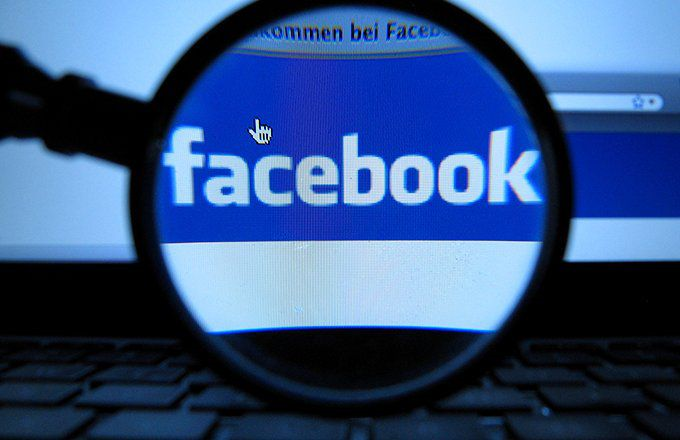

"This exploratory data analysis gives insights from Facebook dataset which consists of identifying users that can be focussed more to increase the business. These valuable insights should help Facebook to take intelligent decision to identify its useful users and provide correct recommendations to them.

<a id=section101></a> 

### 1.1. Introduction
This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 



<a id=section2></a> 
### 2. Load the packages and data 

In [1]:
import sys                                                                   
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       
fb = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv")

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

<a id=section301></a> 
#### dtypes

In [4]:
fb.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

<a id=section302></a> 
#### head

In [7]:
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<a id=section303></a> 
#### describe

In [12]:
fb.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900100e+04,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000
mean,1.597042e+06,37.279048,14.530550,1975.720952,6.283361,537.887375,196.352885,107.453702,156.080646,142.691448,106.118272,84.121948,49.962314,58.569459
std,3.440585e+05,22.588436,9.015595,22.588436,3.529621,457.649874,387.307808,188.788658,572.286274,1387.933546,445.257265,839.897864,285.562930,601.422396
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298804e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895741e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


<a id=section304></a> 
#### pandas profiling


In [ ]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(fb)
profile.to_file(output_file='myoutputfile_preprofiling.html') 

#### Observations

From above dataset, we can infer that male population is more than female where NAN values are in gender and tenure.
- Summary of data types in this dataset:
 - <em>Float</em>: tenure
 - <em>Object</em>: Gender
 - <em>Integer</em>: Everything else
- The following variables have null values that may need to addressed.
 - <strong>gender</strong>: There are 175 missing values. We need to investigate why and need to replace with highest occurence of gender mode for missing values.
 - <strong>tenure</strong>:  There are 2 missing values. so can ignore it.
 - <strong>comments</strong>: There are 177 missing values and these should be cleaned and profiled again .

<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a>
### 4.1. Handling missing data

In [2]:
#printing the columns which has NaN values
nan_cols = [i for i in fb.columns if fb[i].isnull().any()]
print(nan_cols)

['gender', 'tenure']


In [3]:
fb.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [44]:
# checking the count of male and female
fb['gender'].value_counts()

male      58749
female    40254
Name: gender, dtype: int64

####  from above observation, it is understood that male count is more,so replacing NaN (175 missing values) values with male.

<a id=section402></a>
### 4.2. Handling NaN data

In [2]:
#replacing the NaN values with male i.e highest occurence
fb['gender'].fillna('male',inplace=True)

In [3]:
fb.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   2
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<a id=section403></a>
### 4.3. Deleting unwanted rows

In [7]:
#deleting tenure data which is unused
fb.dropna(axis=0,inplace=True)

In [8]:
fb.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

<a id=section404></a>
### 4.4. Pandas post-profiling

In [ ]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(fb)
profile.to_file(output_file='myoutputfile_postprofiling.html') 

<a id=section5></a>
## 5.Analysing the pattern and forming Business questions

<a id=section501></a>
### 5.1 Distribution of age

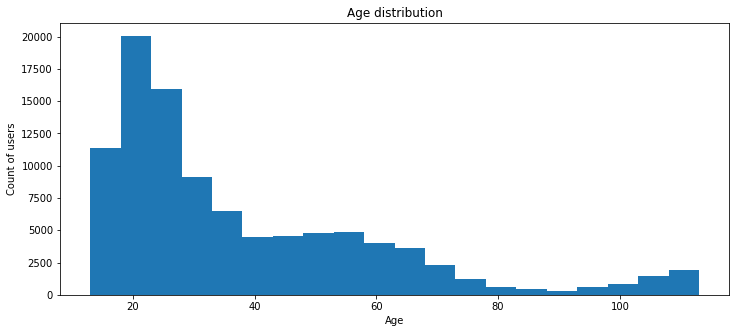

In [85]:
#checking heavy users based on age 
plt.figure(figsize=(12,5))
fb.age.plot.hist(bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of users')
plt.show()

<a id=section502></a>
### 5.2 Grouping the users based on age  group

In [3]:
labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb['age_group'] = pd.cut(fb.age,bins=np.arange(10,121,10),labels=labels,right=True)
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


<a id=section503></a>
### 5.3 Number of users based on age group

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
Name: age_group, dtype: int64


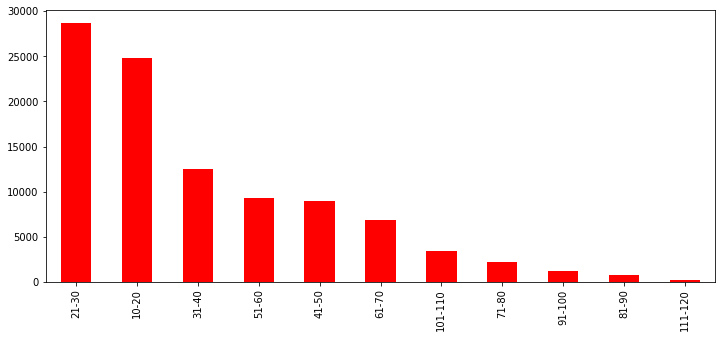

In [38]:
#checking the highest occurence of users based on age group
plt.figure(figsize=(12,5))
age_grp=fb.age_group.value_counts(ascending=False)
print(age_grp)
fb.age_group.value_counts(ascending=False).plot(kind='bar',color='Red')

<a id=section504></a>
### 5.4 Average number of Friends

<a id=section505></a>
#### 5.4.1 Number of Friends based on age group

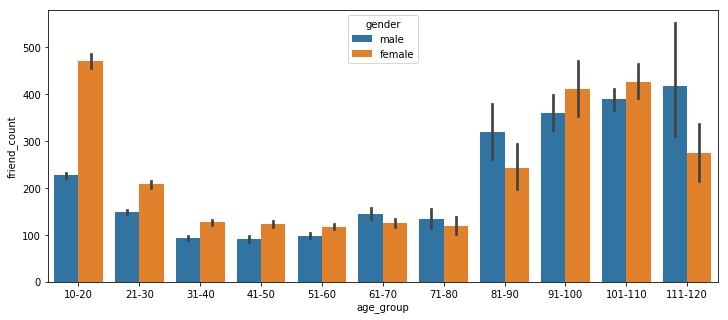

In [5]:
# friend_count vs age_group  
plt.figure(figsize=(12,5))
sns.barplot(x=fb['age_group'],y=fb['friend_count'],hue=fb.gender)

friend_count                     
                  size      sum        mean
age_group                                  
10-20            24752  7964528  321.773109
21-30            28646  4837413  168.868708
31-40            12491  1326360  106.185253
41-50             8968   941531  104.987846
51-60             9319  1012212  108.618092
61-70             6855   918706  134.019840
71-80             2249   282580  125.646954
81-90              817   228721  279.952264
91-100            1219   460636  377.880230
101-110           3449  1385974  401.848072
111-120            238    80656  338.890756

<Figure size 864x360 with 0 Axes>

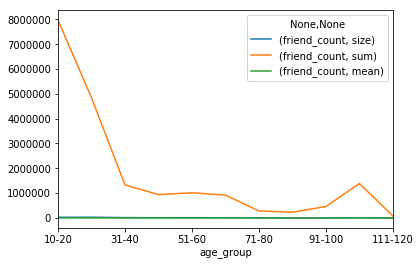

In [39]:
plt.figure(figsize=(12,5))
fb_friend_count=fb.groupby(['age_group'],axis=0).agg({'friend_count':[np.size,np.sum,np.mean]})
fb_friend_count.plot()
fb_friend_count.head(12)


<a id=section506></a>
#### 5.4.2 Number of Friends based on gender

In [40]:
# Friendcount Vs gender
plt.figure(figsize=(12,5))
fb_friend_count=fb.groupby(['gender'],axis=0).agg({'friend_count':[np.size,np.sum,np.mean]})
fb_friend_count.head()

friend_count                     
               size      sum        mean
gender                                  
female        40254  9740258  241.969941
male          58574  9666787  165.035459

<Figure size 864x360 with 0 Axes>

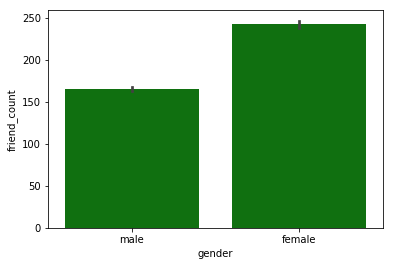

In [33]:
sns.barplot(y=fb.friend_count,x=fb.gender,color='green')

<a id=section507></a>
### 5.5 Average number of likes received

<a id=section508></a>
#### 5.5.1  Number of likes received based on gender

In [41]:
# Likes_received vs gender
plt.figure(figsize=(12,5))
fb_likes_received=fb.groupby(['gender'],axis=0).agg({'likes_received':[np.size,np.sum,np.mean]})
fb_likes_received.head()

likes_received                      
                 size       sum        mean
gender                                     
female          40254  10121282  251.435435
male            58574   3977851   67.911548

<Figure size 864x360 with 0 Axes>

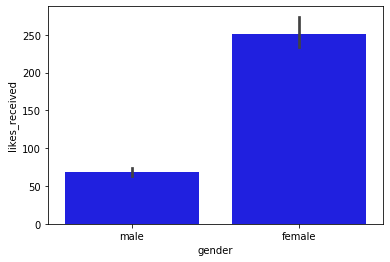

In [19]:
sns.barplot(y=fb.likes_received,x=fb.gender,color='blue')

<a id=section509></a>
#### 5.5.2  Number of likes received based on age group

likes_received                     
                    size      sum        mean
age_group                                    
10-20              24752  6110711  246.877464
21-30              28646  3362829  117.392620
31-40              12491  1163800   93.171083
41-50               8968   975231  108.745651
51-60               9319   952177  102.175877

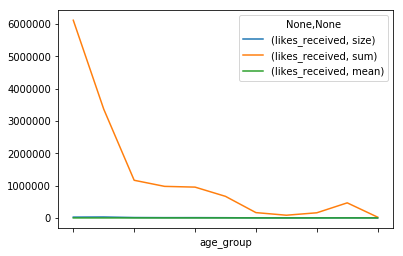

In [92]:
fb_likes_received=fb.groupby(['age_group'],axis=0).agg({'likes_received':[np.size,np.sum,np.mean]})
fb_likes_received.plot()
fb_likes_received.head()

<a id=section510></a>
### 5.6 Calculate likes per day

In [43]:
#Calculating likes per day
fb['likes_per_day']=fb.likes_received/fb.tenure.where(fb.tenure>0)
fb.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,likes_per_day
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20,0.0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20,0.0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20,0.0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20,0.0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20,0.0


<a id=section511></a>
#### 5.6.1 Calculating likes per day based on gender

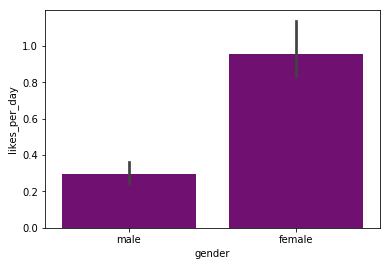

In [44]:
sns.barplot(y=fb.likes_per_day,x=fb.gender,color='purple')

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=fb.likes_per_day,x=fb.age_group,color='purple')

<a id=section512></a>
### 5.7 Number of hours spent on Facebook 

<a id=section513></a>
#### 5.7.1 Based on gender

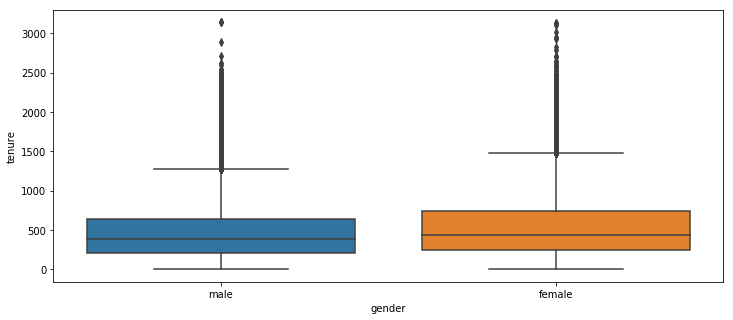

In [59]:
plt.figure(figsize=(12,5))
sns.boxplot(x='gender',y='tenure',data=fb)

                tenure
age_group             
10-20       370.827973
21-30       419.502897
31-40       455.265151
41-50       566.600914
51-60       729.730121
61-70       886.938877
71-80       955.507781
81-90      1077.356618
91-100     1089.701395
101-110    1065.899652
111-120    1578.281513


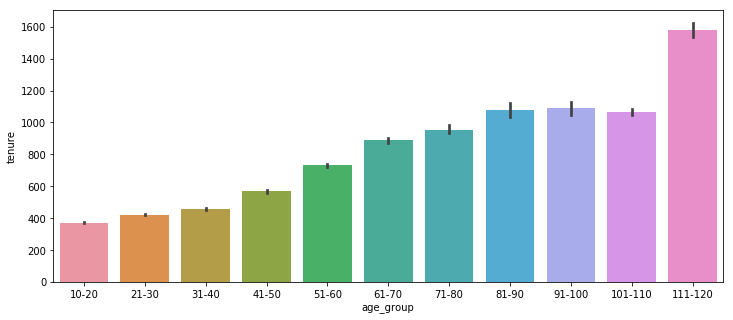

In [60]:
plt.figure(figsize=(12,5))
sns.barplot(y=fb.tenure,x=fb.age_group,data=fb)
tenure_age=fb.pivot_table(values=['tenure'],index='age_group')
print(tenure_age)

<a id=section514></a>
#### 5.7.2 Based on age group

tenure                         
              size         sum         mean
age_group                                  
10-20      24752.0   9178734.0   370.827973
21-30      28646.0  12017080.0   419.502897
31-40      12491.0   5686717.0   455.265151
41-50       8968.0   5081277.0   566.600914
51-60       9319.0   6800355.0   729.730121
61-70       6855.0   6079966.0   886.938877
71-80       2249.0   2148937.0   955.507781
81-90        817.0    879123.0  1077.356618
91-100      1219.0   1328346.0  1089.701395
101-110     3449.0   3675222.0  1065.899652
111-120      238.0    375631.0  1578.281513

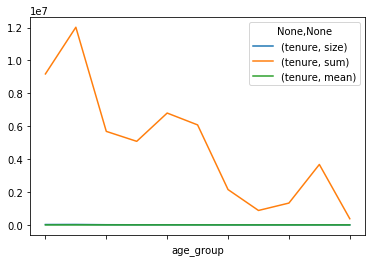

In [81]:
fb_tenure=fb.groupby(['age_group'],axis=0).agg({'tenure':[np.size,np.sum,np.mean]})
fb_tenure.plot()
fb_tenure.head(12)

<a id=section515></a>
### 5.8 Categorize the likes received

<a id=section516></a>
#### 5.8.1 Based on gender

        mobile_likes  mobile_likes_received  www_likes  www_likes_received
gender                                                                    
female    172.912928             147.100884  87.138297          104.334451
male       60.261328              40.833015  24.416550           27.078533


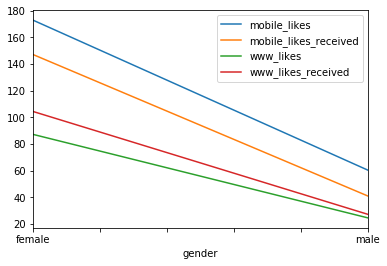

In [62]:
likes_gender=fb.pivot_table(values=['mobile_likes','mobile_likes_received','www_likes','www_likes_received'],index='gender')
print(likes_gender)
likes_gender.plot()

<a id=section517></a>
#### 5.8.2 Based on Age_group

           mobile_likes  mobile_likes_received  www_likes  www_likes_received
age_group                                                                    
10-20        140.201519             146.787371  70.758525          100.089973
21-30         94.875829              72.505760  28.611918           44.886860
31-40         94.638860              57.275719  25.607477           35.895365
41-50        108.732605              61.378457  43.106267           47.367194
51-60         96.968881              52.530958  70.733984           49.644919
61-70         85.715974              48.967615  78.604814           48.309847
71-80         55.921298              32.119609  66.786127           40.876834
81-90         82.771114              63.441860  48.974296           38.795594
91-100       114.913043              79.292863  57.537326           50.704676
101-110       92.337489              84.985213  57.530589           50.059148
111-120       72.794118              54.525210  51.163866       

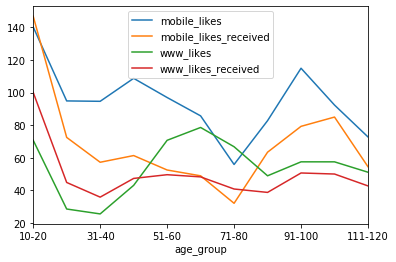

In [10]:
likes_age=fb.pivot_table(values=['mobile_likes','mobile_likes_received','www_likes','www_likes_received'],index='age_group')
print(likes_age)
likes_age.plot()

<a id=section518></a>
### 5.9 Corelation among likes

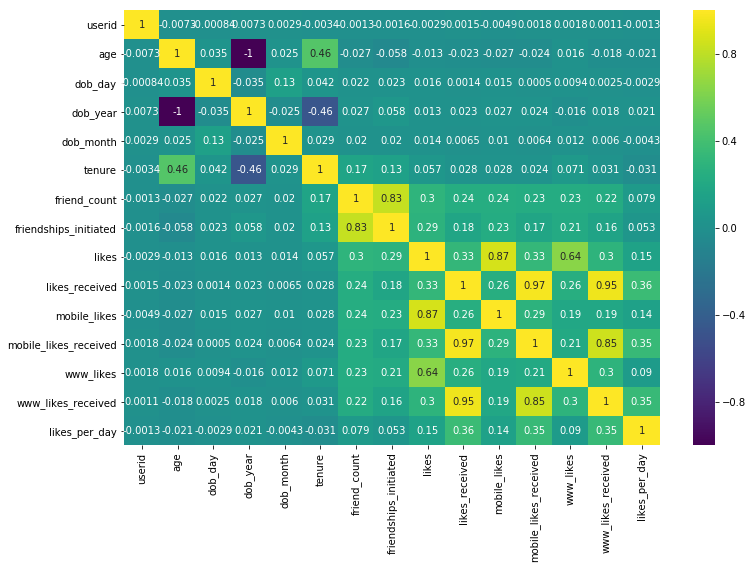

In [67]:
corr_mat = fb.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

<a id=section6></a>
### 6 Conclusion

- **Interesting facts analysed** :<br>
Male users are more but female are more likely to be active in face book
Tenure for old adults are more but likes received for young people are more irrespective of tenure.



<a id=section7></a>
### 7 Actionable insights


- In order to **increase the users on facebook** , need to give more page **suggestions or recommendations** to the users searches.

- There are **interaction chalenges** to users aged from middle age and above, can improve **design of social network platform** to make old adults to play better in Face book.

- To attract **male** users , can introduce more **games** and **movies** according to the trend.

